In [2]:
import pandas as pd

DATA = "../dados/train.csv"

df_train = pd.read_csv(DATA)

df_train.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


# Tratando os dados vazios:

In [4]:
df_train.shape    # Mostra numero de linhas e colunas do dataset de treino

(1460, 81)

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

#### Como temos muitas colunas e um numero não muito grande de linhas, temos que tomar cuidado para que o nosso processo não sofra overfitting

#### Tratando a base de dados a respeito de valores vazios:

In [8]:
df_train.isnull().sum().sort_values(ascending=False).head(20)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageQual        81
GarageFinish      81
GarageType        81
GarageYrBlt       81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtCond          37
BsmtQual          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
Condition2         0
dtype: int64

#### Valores nulos em percentual:

In [10]:
(df_train.isnull().sum() / df_train.shape[0] * 100).sort_values(ascending=False).head(20)

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
MasVnrType      59.726027
FireplaceQu     47.260274
LotFrontage     17.739726
GarageQual       5.547945
GarageFinish     5.547945
GarageType       5.547945
GarageYrBlt      5.547945
GarageCond       5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtCond         2.534247
BsmtQual         2.534247
BsmtFinType1     2.534247
MasVnrArea       0.547945
Electrical       0.068493
Condition2       0.000000
dtype: float64

#### Vamos eliminar as colunas que possuem mais de 10% dos dados vazios na base de treino

In [12]:
df_train.columns   # Mostra todas as colunas do dataset

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [13]:
df_train.columns[df_train.isnull().sum() / df_train.shape[0] > 0.1]

Index(['LotFrontage', 'Alley', 'MasVnrType', 'FireplaceQu', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

#### Dropando essas features:

In [15]:
eliminar = df_train.columns[df_train.isnull().sum() / df_train.shape[0] > 0.1]

df_train = df_train.drop(eliminar, axis=1)

df_train

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112,0,0,0,0,4,2010,WD,Normal,142125


#### - Queremos criar um primeiro modelo para verificar o quanto estamos errando e depois planejar como melhorar. Para isso:
    - Precisamos **retirar os valores vazios**
    - Vamos **eliminar as colunas de texto**
    - Vamos **escolher alguns algoritmos para testar e um método de avaliação de erro**

#### Retirando os dados vazios e substituindo por (-1):

In [18]:
df_train = df_train.fillna(-1)

df_train.isnull().sum().sort_values(ascending=False).head(3)

Id            0
MSSubClass    0
MSZoning      0
dtype: int64

#### Para tratar as colunas tipo object(texto), vamos simplesmente eliminá-las:

In [20]:
df_train.dtypes != "object"

Id                True
MSSubClass        True
MSZoning         False
LotArea           True
Street           False
                 ...  
MoSold            True
YrSold            True
SaleType         False
SaleCondition    False
SalePrice         True
Length: 74, dtype: bool

In [21]:
col_numeric = df_train.columns[df_train.dtypes != "object"]

col_numeric

Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

#### Criar uma base com esses valores:

In [23]:
df_train.loc[:, col_numeric]

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,7917,6,5,1999,2000,0.0,0,0,...,0,40,0,0,0,0,0,8,2007,175000
1456,1457,20,13175,6,6,1978,1988,119.0,790,163,...,349,0,0,0,0,0,0,2,2010,210000
1457,1458,70,9042,7,9,1941,2006,0.0,275,0,...,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,20,9717,5,6,1950,1996,0.0,49,1029,...,366,0,112,0,0,0,0,4,2010,142125


In [24]:
df_train = df_train.loc[:, col_numeric]

#### Essa será a nossa base inicial de treino.

# Criando e avaliando diferentes modelos nesses dados (Regressão Linear, Árvore de Regressão e KNN)

#### Criando as bases de treino e teste

In [28]:
X = df_train.drop("SalePrice", axis=1)
y = df_train["SalePrice"]

#### Importando a biblioteca para separar base treino e teste:

In [30]:
from sklearn.model_selection import train_test_split


#### Separando a base em treino e teste:

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state=42)

### Regressão Linear:

#### Importando a Regressão Linear

In [35]:
from sklearn.linear_model import LinearRegression

#### Criando o regressor e fazendo fit com os dados de treino

In [37]:
reg_rl = LinearRegression().fit(X_train, y_train)

#### Fazendo a previsão para os dados de teste

In [39]:
y_pred_rl = reg_rl.predict(X_test)

### Arvore de Regressão:

#### Importando a árvore de decisão

In [42]:
from sklearn import tree

#### Criando o regressor e fazendo fit com os dados de treino

In [44]:
reg_ad = tree.DecisionTreeRegressor().fit(X_train, y_train)

#### Fazendo a previsão para os dados de teste

In [46]:
y_pred_ad = reg_ad.predict(X_test)

### KNN:

#### Importando o KNN

In [49]:
from sklearn.neighbors import KNeighborsRegressor

#### Criando o regressor e fazendo fit com os dados de treino

In [51]:
reg_knn = KNeighborsRegressor(n_neighbors=2).fit(X_train, y_train)

#### Fazendo a previsão para os dados de teste

In [53]:
y_pred_knn = reg_knn.predict(X_test)

### Verificação dos resultados:

#### Erro Médio Absoluto - Mean Absolute Error  
#### Erro Médio Quadrático - Mean Squared Error

### Importando os algoritmos:

In [57]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

### Avaliando o erro de regressão:

In [59]:
print(mean_absolute_error(y_test, y_pred_rl))
print(mean_squared_error(y_test, y_pred_rl))

23763.18739306416
1533982883.4448185


### Avaliando o erro de árvore de decisão:

In [61]:
print(mean_absolute_error(y_test, y_pred_ad))
print(mean_squared_error(y_test, y_pred_ad))

27406.46887966805
1922194004.6099584


### Avaliando o erro do KNN:

In [63]:
print(mean_absolute_error(y_test, y_pred_knn))
print(mean_squared_error(y_test, y_pred_knn))

33273.08298755187
2733937586.841286


# Apresentando visualmente a relação entre os dados reais (y_test) e a previsão feita nos 3 modelos (y_pred)

In [65]:
import matplotlib.pyplot as plt

#### Criando o gráfico

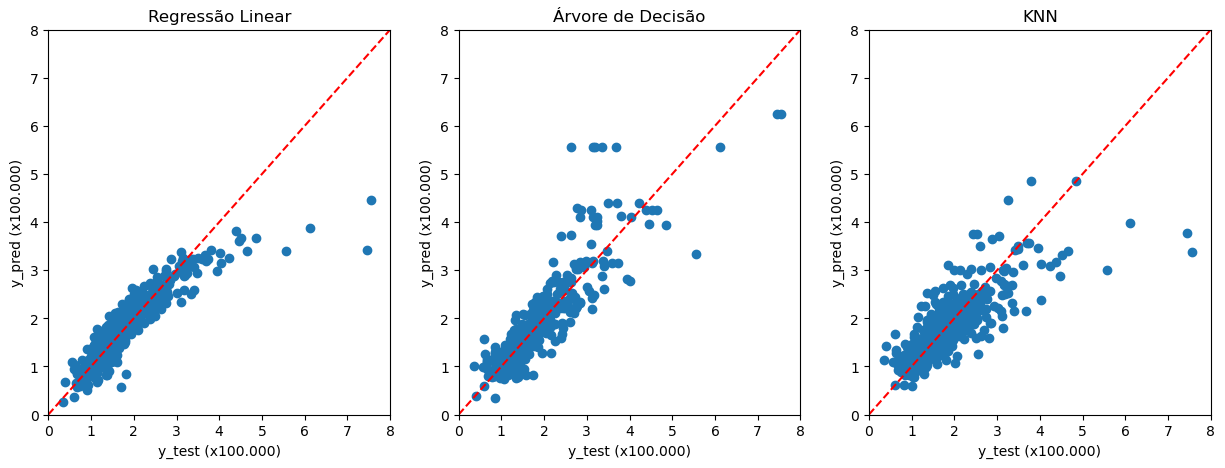

In [67]:
fig, ax = plt.subplots(ncols=3, figsize=(15, 5))

ax[0].scatter(y_test/100000, y_pred_rl/100000)
ax[0].plot([0, 8], [0, 8], "--r")
ax[1].scatter(y_test/100000, y_pred_ad/100000)
ax[1].plot([0, 8], [0, 8], "--r")
ax[2].scatter(y_test/100000, y_pred_knn/100000)
ax[2].plot([0, 8], [0, 8], "--r")

ax[0].set(xlim=(0, 8), ylim=(0, 8))
ax[0].set_xlabel("y_test (x100.000)")
ax[0].set_ylabel("y_pred (x100.000)")
ax[0].set_title("Regressão Linear")
ax[1].set(xlim=(0, 8), ylim=(0, 8))
ax[1].set_xlabel("y_test (x100.000)")
ax[1].set_ylabel("y_pred (x100.000)")
ax[1].set_title("Árvore de Decisão")
ax[2].set(xlim=(0, 8), ylim=(0, 8))
ax[2].set_xlabel("y_test (x100.000)")
ax[2].set_ylabel("y_pred (x100.000)")
ax[2].set_title("KNN")

plt.show()

#### A reta vermelha nos mostra quando ytest = ypred (acerto de 100%). CAnalisando os gráficos, vemos que a regressão linear tem uma eficácia maior do que Árvore de Decisão e KNN. Podemos ver isso verificando os erros calculados acima

#  Fazendo a previsão nos dados de treino e submetendo nosso modelo para avaliação do Kaggle

### Importando a base de teste

In [71]:
teste = pd.read_csv("../dados/test.csv")

## Visualizando a base de dados:

In [73]:
teste.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal


### Eliminando as mesmas colunas da base de treino (colunas com muitos valores vazios)

In [75]:
teste = teste.drop(eliminar, axis=1)

### Verificando as colunas numéricas

In [77]:
col_nr_test = teste.columns[teste.dtypes != "object"]
col_nr_test

Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

### Mantendo também as coluna numéricas

In [79]:
teste = teste.loc[:, col_nr_test]
teste.head(3)

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,1461,20,11622,5,6,1961,1961,0.0,468.0,144.0,...,730.0,140,0,0,0,120,0,0,6,2010
1,1462,20,14267,6,6,1958,1958,108.0,923.0,0.0,...,312.0,393,36,0,0,0,0,12500,6,2010
2,1463,60,13830,5,5,1997,1998,0.0,791.0,0.0,...,482.0,212,34,0,0,0,0,0,3,2010


In [80]:
teste.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 36 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   LotArea        1459 non-null   int64  
 3   OverallQual    1459 non-null   int64  
 4   OverallCond    1459 non-null   int64  
 5   YearBuilt      1459 non-null   int64  
 6   YearRemodAdd   1459 non-null   int64  
 7   MasVnrArea     1444 non-null   float64
 8   BsmtFinSF1     1458 non-null   float64
 9   BsmtFinSF2     1458 non-null   float64
 10  BsmtUnfSF      1458 non-null   float64
 11  TotalBsmtSF    1458 non-null   float64
 12  1stFlrSF       1459 non-null   int64  
 13  2ndFlrSF       1459 non-null   int64  
 14  LowQualFinSF   1459 non-null   int64  
 15  GrLivArea      1459 non-null   int64  
 16  BsmtFullBath   1457 non-null   float64
 17  BsmtHalfBath   1457 non-null   float64
 18  FullBath

#### Agora temos somente os dados numéricos

### Visualizando quantidade de numeros vazios

In [83]:
teste.isnull().sum().sort_values(ascending=False)

GarageYrBlt      78
MasVnrArea       15
BsmtHalfBath      2
BsmtFullBath      2
GarageCars        1
GarageArea        1
BsmtFinSF2        1
BsmtUnfSF         1
TotalBsmtSF       1
BsmtFinSF1        1
MSSubClass        0
Id                0
OverallQual       0
LotArea           0
YearBuilt         0
2ndFlrSF          0
GrLivArea         0
OverallCond       0
1stFlrSF          0
YearRemodAdd      0
HalfBath          0
FullBath          0
LowQualFinSF      0
BedroomAbvGr      0
Fireplaces        0
TotRmsAbvGrd      0
KitchenAbvGr      0
WoodDeckSF        0
OpenPorchSF       0
EnclosedPorch     0
3SsnPorch         0
ScreenPorch       0
PoolArea          0
MiscVal           0
MoSold            0
YrSold            0
dtype: int64

### Trocando todos os valores vazios por (-1)

In [85]:
teste = teste.fillna(-1)

teste.isnull().sum().sort_values(ascending=False).head(3)

Id            0
MSSubClass    0
LotArea       0
dtype: int64

### Vamos utilizar Regressão Linear para fazer a previsão

In [128]:
y_pred = reg_rl.predict(teste)

### Adicionar essa coluna de previsão na nossa base

In [132]:
teste["SalePrice"] = y_pred

### Extrair apenas Id e SalesPrice (formato para submissão no Kaggle:)

In [135]:
base_kaggle = teste[["Id", "SalePrice"]]

base_kaggle.head(3)

,Id,SalePrice
0,1461,122234.995960
1,1462,139178.263684
2,1463,169872.054251


### Exportando a base

In [138]:
base_kaggle.to_csv("../dados/resultado1.csv", index=False)